# T1 - Getting started

Installing and getting started with Covasim is quite simple. 

To install, just type `pip install covasim`. If it worked, you should be able to import Covasim with `import covasim as cv`.

The basic design philosophy of Covasim is: **common tasks should be simple**. For example:

- Defining parameters
- Running a simulation
- Plotting results

This tutorial walks you through how to do these things.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/institutefordiseasemodeling/covasim/HEAD?urlpath=lab%2Ftree%2Fdocs%2Ftutorials%2Ftut_intro.ipynb) to open an interactive version of this notebook.
    
</div>

## Hello world

To create, run, and plot a sim with default options is just:

In [ ]:
import covasim as cv

sim = cv.Sim()
sim.run()
fig = sim.plot()

## Defining parameters and running simulations

Parameters are defined as a dictionary. The most common parameters to modify are the population size, the initial number of people infected, and the start and end dates of the simulation. We can define those as:

In [ ]:
pars = dict(
    pop_size = 50e3,
    pop_infected = 100,
    start_day = '2020-04-01',
    end_day = '2020-06-01',
)

Running a simulation is pretty easy. In fact, running a sim with the parameters we defined above is just:

In [ ]:
sim = cv.Sim(pars)
sim.run()

This will generate a results dictionary `sim.results`. For example, the number of new infections per day is `sim.results['new_infections']`.

Rather than creating a parameter dictionary, any valid parameter can also be passed to the sim directly. For example, exactly equivalent to the above is:

In [ ]:
sim = cv.Sim(pop_size=50e3, pop_infected=100, start_day='2020-04-01', end_day='2020-06-01')
sim.run()

You can mix and match too – pass in a parameter dictionary with default options, and then include other parameters as keywords (including overrides; keyword arguments take precedence). For example:

In [ ]:
sim = cv.Sim(pars, pop_infected=10) # Use parameters defined above, except start with 10 infected people
sim.run()

## Plotting results

As you saw above, plotting the results of a simulation is rather easy too:

In [ ]:
fig = sim.plot()

## Full usage example

Many of the details of this example will be explained in later tutorials, but to give you a taste, here's an example of how you would run two simulations to determine the impact of a custom intervention aimed at protecting the elderly.

Covasim 3.1.4 (2022-10-22) — © 2020-2022 by IDM


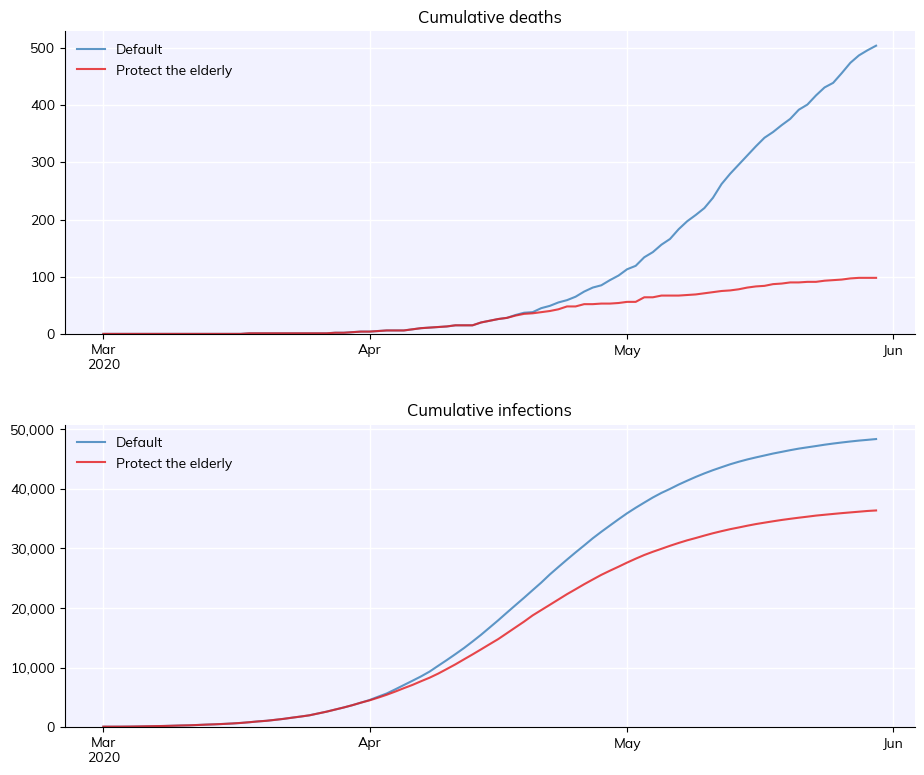

In [1]:
import covasim as cv

# Custom intervention -- see Tutorial 5
def protect_elderly(sim):
    if sim.t == sim.day('2020-04-01'):
        elderly = sim.people.age>70
        sim.people.rel_sus[elderly] = 0.0

pars = dict(
    pop_type = 'hybrid', # Use a more realistic population model
    location = 'japan', # Use population characteristics for Japan
    pop_size = 50e3, # Have 50,000 people total in the population
    pop_infected = 100, # Start with 100 infected people
    n_days = 90, # Run the simulation for 90 days
    verbose = 0, # Do not print any output
)

# Running with multisims -- see Tutorial 3
s1 = cv.Sim(pars, label='Default')
s2 = cv.Sim(pars, interventions=protect_elderly, label='Protect the elderly')
msim = cv.MultiSim([s1, s2])
msim.run()
fig = msim.plot(['cum_deaths', 'cum_infections'])